## Import Libraries

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import warnings
warnings.simplefilter('ignore')

2022-11-27 00:19:12.311043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 00:19:13.492111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 00:19:13.492144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-27 00:19:13.591596: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-27 00:19:18.965362: W tensorflow/stream_executor/platform/de

## Image Data Generator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

x_train=train_datagen.flow_from_directory(directory="data/train",target_size=(64,64),batch_size=32,class_mode='categorical')

x_test=test_datagen.flow_from_directory(directory="data/test",target_size=(64,64),batch_size=32,class_mode='categorical')

Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


## Initialization CNN Model

In [3]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(6,activation='softmax'))

2022-11-27 00:19:22.355069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-27 00:19:22.355112: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-27 00:19:22.355160: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ali): /proc/driver/nvidia/version does not exist
2022-11-27 00:19:22.355551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Model Summary

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 985,190
Trainable params: 985,190
Non-trainable params: 0
__________________________________________________

## Model Fitting

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=20,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/20
480/480 [==============================] - 59s 123ms/step - loss: 1.3542 - accuracy: 0.5867 - val_loss: 0.9916 - val_accuracy: 0.5829
Epoch 2/20
480/480 [==============================] - 62s 129ms/step - loss: 0.5775 - accuracy: 0.8118 - val_loss: 0.6499 - val_accuracy: 0.7571
Epoch 3/20
480/480 [==============================] - 57s 119ms/step - loss: 0.3696 - accuracy: 0.8895 - val_loss: 0.5238 - val_accuracy: 0.8207
Epoch 4/20
480/480 [==============================] - 61s 126ms/step - loss: 0.2912 - accuracy: 0.9108 - val_loss: 0.4819 - val_accuracy: 0.8333
Epoch 5/20
480/480 [==============================] - 62s 129ms/step - loss: 0.2515 - accuracy: 0.9256 - val_loss: 0.4514 - val_accuracy: 0.8514
Epoch 6/20
480/480 [==============================] - 60s 124ms/step - loss: 0.2368 - accuracy: 0.9316 - val_loss: 0.4315 - val_accuracy: 0.8598
Epoch 7/20
480/480 [==============================] - 61s 127ms/step - loss: 0.2243 - accuracy: 0.9338 - val_loss: 0.4141 - val_ac

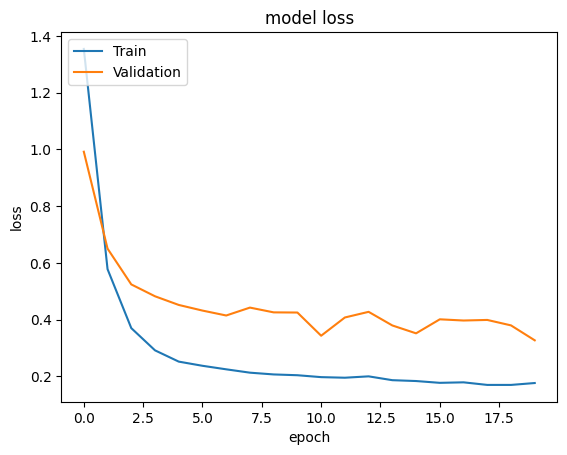

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

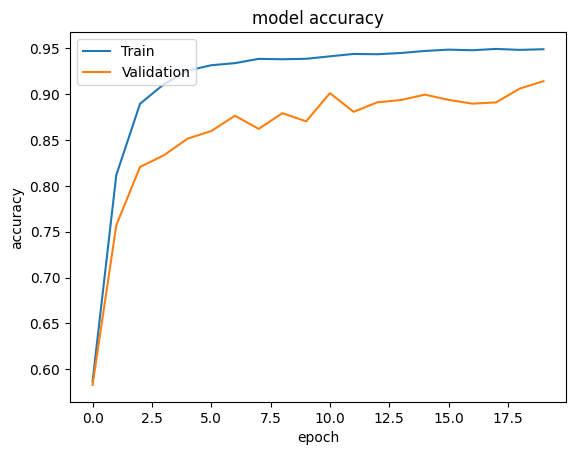

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Saving the model

In [8]:
model.save('ECG.h5')

## Model Evaluation on Train and Test

In [9]:
model.evaluate(x_train)
model.evaluate(x_test)

214/214 [==============================] - 8s 36ms/step - loss: 0.3266 - accuracy: 0.9141


[0.3265856206417084, 0.9141392111778259]

## Sample Prediction

In [11]:
model=load_model("ECG.h5")

img=tf.keras.utils.load_img("data/test/Normal/fig_2114.png",target_size=(64,64))

x=tf.keras.utils.img_to_array(img)

x=np.expand_dims(x,axis=0)

pred=model.predict(x)

classes_x=np.argmax(pred,axis=1)

classes_x


index=["Left Bundle Branch Block","Normal","Premature Atrial Contraction","Premature Ventricular Contractions","Right Bundle Branch Block","Ventricular Fibrillation"]

result=str(index[classes_x[0]])
result

1/1 [==============================] - 0s 178ms/step


'Normal'